In [24]:
%matplotlib inline

In [25]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import imageio
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [26]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


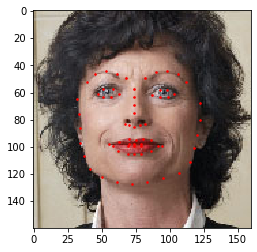

In [27]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(imageio.imread(os.path.join('data/faces/', img_name)),
               landmarks)
plt.show()

In [29]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('data/faces/shape_predictor_68_face_landmarks.dat')

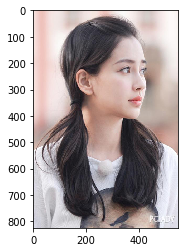

In [56]:
myface = imageio.imread('data/side_face2.jpg')
plt.imshow(myface)

In [57]:
dets = detector(myface, 1)
print(dets)
shape = predictor(myface, dets[0])
print(shape.num_parts)
print(shape.parts())

rectangles[[(266, 167) (489, 390)]]
68
points[(222, 235), (222, 270), (225, 306), (232, 341), (253, 368), (285, 385), (319, 398), (352, 409), (378, 413), (396, 407), (406, 385), (412, 363), (418, 338), (423, 314), (427, 292), (426, 269), (422, 252), (307, 204), (326, 192), (347, 186), (368, 189), (383, 201), (419, 212), (424, 209), (428, 209), (432, 212), (433, 216), (404, 236), (410, 251), (417, 266), (423, 280), (390, 305), (401, 306), (409, 307), (416, 306), (421, 303), (331, 231), (346, 223), (359, 223), (366, 236), (357, 238), (344, 236), (406, 243), (414, 236), (422, 237), (424, 248), (420, 250), (412, 248), (360, 343), (383, 332), (401, 325), (406, 328), (409, 327), (410, 336), (402, 350), (404, 354), (401, 359), (398, 360), (392, 360), (378, 355), (367, 343), (397, 340), (403, 340), (404, 342), (401, 347), (404, 343), (401, 344), (396, 344)]


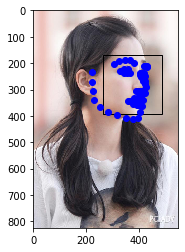

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = plt.Rectangle((dets[0].left(),dets[0].top()), dets[0].width(),dets[0].height(), fill=False)
ax.add_patch(rect)
for p in shape.parts():
    plt.plot(p.x,p.y,'bo')
plt.imshow(myface)
plt.show()